In [1]:
#read csv file data
import pandas as pd
wifi_data = pd.read_csv("ph-sample.csv")

In [2]:
wifi_data.describe()

_time                    ap_name  \
count                        2813                       2813   
unique                       2704                          4   
top     2024-04-16 09:59:13-04:00  300fuller-104-cw9166-hc-1   
freq                            3                       1132   

                                                    netid      ssid  \
count                                                2813      2813   
unique                                                189         4   
top     b23a6a8439c0dde5515893e7c90c1e3233b8616e634470...  Dukeblue   
freq                                                  632      2127   

               assoc                                            macaddr  
count           2813                                               2813  
unique             2                                                275  
top     reassociated  bacd9e3c39408c10a6278fe6d5c1bd4e99ae280de684d9...  
freq            2255                                                180

In [3]:
def create_dictionary():
    index=0
    dict1={}
    for item in wifi_data["_time"]:
        dict1[wifi_data["_time"][index]]=[]
        index+=1
    index=0
    for item in wifi_data["_time"]:
        dict1[wifi_data["_time"][index]].append([wifi_data["ap_name"][index],wifi_data["netid"][index],wifi_data["ssid"][index]])
        index+=1

    return dict1
    
#SUCCESS!! Now we have a dictionary that can include every single data point, with each value as a list associated with a specific time!

In [4]:
#lets try this again
#figuring out how to count how many people were connected to Wifi in a certain time range
dict1=create_dictionary()
april17=[]

from collections import Counter

# def get_day:

def get_hour(timestamp):
    return timestamp.split(' ')[1].split(':')[0]
    
#have to generalize this eventually for every different date...will do so eventually
for key in dict1:
    if "2024-04-17" in key:
        april17.append(key)
print(len(april17), "is the total number of detected Wifi signals on April 17th.")

hour_list=[]
for item in april17:
    hour=get_hour(item)
    hour_list.append(hour)

hour_count = Counter(hour_list)
hour_count_dict=dict(hour_list)

sorted_time_dict = sorted(hour_count.items())
print(sorted_time_dict)

#interesting...we got the number of devices connected each hour, but check out the early morning hours...
#seems like there's 3 devices that are connected between 1am and 4am...maybe these are stationary devices, not humans!
#should try to grab the netids to see if they are three of the same every hour?

1209 is the total number of detected Wifi signals on April 17th.
[('00', 4), ('01', 3), ('02', 3), ('03', 3), ('04', 3), ('05', 13), ('06', 18), ('07', 33), ('08', 67), ('09', 144), ('10', 96), ('11', 135), ('12', 104), ('13', 50), ('14', 101), ('15', 67), ('16', 111), ('17', 81), ('18', 51), ('19', 25), ('20', 64), ('21', 20), ('22', 7), ('23', 6)]


In [5]:
#now lets make a dictionary with hour as key and every other data point as value

dict1=create_dictionary()

def get_hour(timestamp):
    return timestamp.split(' ')[1].split(':')[0]

grouped_by_hour = {}
for key, values in dict1.items():
    if "2024-04-17" in key:
        hour = get_hour(key)
        if hour not in grouped_by_hour:
            grouped_by_hour[hour] = []
        grouped_by_hour[hour].extend(values)

sorted_hourly_dict = sorted(grouped_by_hour.items())

#check it out! b23 is super frequently appearing in the early morning...probably a stationary device in the building!

In [6]:
#BUT lets see how many PEOPLE (netids) were in each room each hour!
occupancy_hourly_dict={}
for key,values in sorted_hourly_dict:
    value_list=[]
    occupancy_hourly_dict[key]=[]
    for value in values:
        if value[1] not in value_list:
            value_list.append(value[1])
    occupancy_hourly_dict[key]=value_list

#this will basically get rid of all the repeat netids in the hour

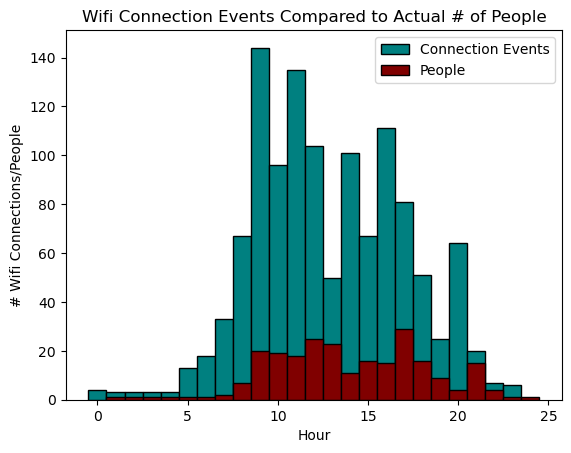

In [7]:
import matplotlib.pyplot as plt
import numpy as np

#device Wifi connection events
keys_list=[]
value_list=[]
for key, value in sorted_time_dict:
    keys_list.append(key)
    value_list.append(value)

hours=np.array(keys_list)
devices_connected=np.array(value_list)

#actual number of people in room
key_list=[]
value_list=[]
for key, value in occupancy_hourly_dict.items():
    key_list.append(key)
    value_list.append(len(value))

hours=np.array(key_list)
number_of_people=np.array(value_list)

barWidth=1
br1 = np.arange(len(hours)) 
br2 = [x + barWidth for x in br1]  
plt.bar(br1, devices_connected, color ='teal', width = barWidth, 
        edgecolor ='black', label ='Connection Events') 
plt.bar(br2, number_of_people, color ='maroon', width = barWidth, 
        edgecolor ='black', label ='People') 
plt.title("Wifi Connection Events Compared to Actual # of People")
plt.xlabel("Hour")
plt.ylabel("# Wifi Connections/People")

plt.legend()
plt.show()

In [8]:
#create color gradient list from num people in building at each hour
print(hours)
print(number_of_people)

'''gradient map will be in groups of 5:
<5 people: #44ce1b
<10 people: #bbdb44
<15 people: #f7e379
<20 people: #f2a134
<25 people: #ec771e
<=30 people: #e51f1f '''

color_grad=[]

for item in number_of_people:
    if item < 5:
        color_grad.append("#44ce1b")
    elif item < 10:
        color_grad.append("#bbdb44")
    elif item < 15:
        color_grad.append("#f7e379")
    elif item < 20:
        color_grad.append("#f2a134")
    elif item < 25:
        color_grad.append("#ec771e")
    elif item <= 30:
        color_grad.append("#e51f1f")

print(color_grad)

['00' '01' '02' '03' '04' '05' '06' '07' '08' '09' '10' '11' '12' '13'
 '14' '15' '16' '17' '18' '19' '20' '21' '22' '23']
[ 1  1  1  1  1  1  2  7 20 19 18 25 23 11 16 15 29 16  9  4 15  4  1  1]
['#44ce1b', '#44ce1b', '#44ce1b', '#44ce1b', '#44ce1b', '#44ce1b', '#44ce1b', '#bbdb44', '#ec771e', '#f2a134', '#f2a134', '#e51f1f', '#ec771e', '#f7e379', '#f2a134', '#f2a134', '#e51f1f', '#f2a134', '#bbdb44', '#44ce1b', '#f2a134', '#44ce1b', '#44ce1b', '#44ce1b']


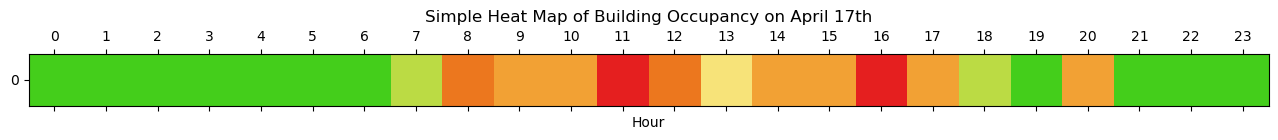

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

nrows, ncols = 1,24
image = np.arange(ncols).reshape((nrows, ncols))

row_labels = range(nrows)
col_labels = range(ncols)

cmap = ListedColormap(color_grad)

plt.matshow(image, cmap=cmap)
plt.xticks(range(ncols), col_labels)
plt.yticks(range(nrows), row_labels)
plt.xlabel("Hour")
plt.title("Simple Heat Map of Building Occupancy on April 17th")

plt.show()

In [11]:
#dictionary with room information
room_hourly_dict={}
for key,values in sorted_hourly_dict:
    value_list=[]
    id_storage=[]
    room_hourly_dict[key]=[]
    for value in values:
        if value[1] not in id_storage:
            value_list.append(value[0])
            # value_list.append(value[1])
            id_storage.append(value[1])
            room_hourly_dict[key].append(value_list)
        value_list=[]

#for each hour, determine how many people in each room
total_room_counts = {}

for hour, rooms in room_hourly_dict.items():
    room_count = {}
    for room_list in rooms:
        for room in room_list:
            room_count[room] = room_count.get(room, 0) + 1
    total_room_counts[hour]=room_count
total_room_counts=sorted(total_room_counts.items())
room_count=sorted(room_count.items())

In [12]:
room_dict = {}

for hour, room_data in total_room_counts:
    for room, count in room_data.items():
        if room not in room_dict:
            room_dict[room] = {}
        room_dict[room][hour] = count
print(room_dict)

{'300fuller-104-cw9166-hc-1': {'00': 1, '05': 1, '06': 1, '08': 10, '09': 6, '10': 5, '11': 12, '12': 10, '13': 3, '14': 7, '15': 2, '16': 10, '17': 1, '18': 1, '19': 2, '20': 3, '22': 1}, '300fuller-116-cw9166-hc-1': {'01': 1, '02': 1, '03': 1, '04': 1, '07': 1, '08': 3, '09': 1, '10': 3, '11': 2, '12': 2, '13': 1, '14': 2, '15': 5, '16': 1, '17': 1, '18': 2, '20': 2, '21': 2}, '300fuller-101b-cw9166-rw-1': {'06': 1, '07': 3, '08': 4, '09': 6, '10': 9, '11': 4, '12': 7, '13': 4, '14': 6, '15': 4, '16': 13, '17': 9, '18': 2, '19': 2, '20': 7, '21': 1, '23': 1}, '300fuller-101b-cw9166i-rw-2': {'07': 3, '08': 3, '09': 6, '10': 1, '11': 7, '12': 4, '13': 3, '14': 1, '15': 4, '16': 5, '17': 5, '18': 4, '20': 3, '21': 1}}


In [13]:
def count_people_in_room(room_name):
    room1=room_dict[room_name]
    hours=[]
    number_of_people=[]
    all_hours = [str(hour).zfill(2) for hour in range(24)]
    for hour in all_hours:
        if hour not in room1:
            room1[hour] = 0
    room1=sorted(room1.items())
    for hour, number in room1:
        hours.append(hour)
        number_of_people.append(number)
    
    return number_of_people

In [14]:
#generalize for all rooms

def create_room_gradient(number_of_people):
    color_grad=[]
    
    for item in number_of_people:
        if item < 5:
            color_grad.append("#44ce1b")
        elif item < 10:
            color_grad.append("#bbdb44")
        elif item < 15:
            color_grad.append("#f7e379")
        elif item < 20:
            color_grad.append("#f2a134")
        elif item < 25:
            color_grad.append("#ec771e")
        elif item <= 30:
            color_grad.append("#e51f1f")
    
    return color_grad

In [15]:
#generalize for all rooms
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

def plot_heat_map(room):
    nrows, ncols = 1,24
    image = np.arange(ncols).reshape((nrows, ncols))
    
    row_labels = range(nrows)
    col_labels = range(ncols)

    color_grad=create_room_gradient(number_of_people)
    cmap = ListedColormap(color_grad)
    
    plt.matshow(image, cmap=cmap)
    plt.xticks(range(ncols), col_labels)
    plt.yticks(range(nrows), row_labels)
    plt.xlabel("Hour")
    plt.title("Room " +room+ " Occupancy on April 17th")
    
    plt.show()

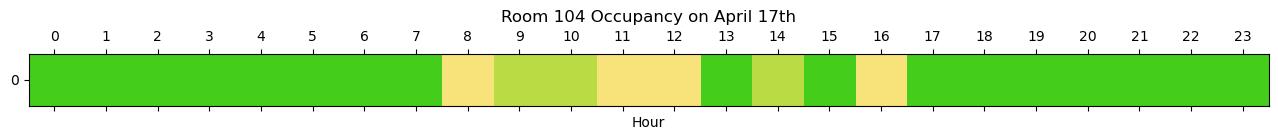

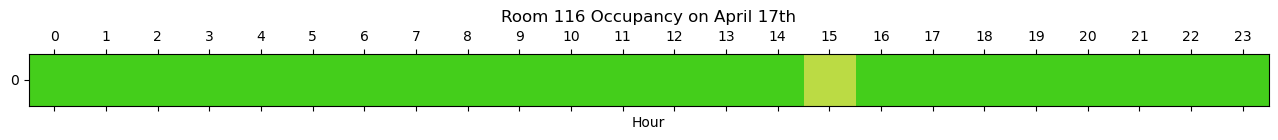

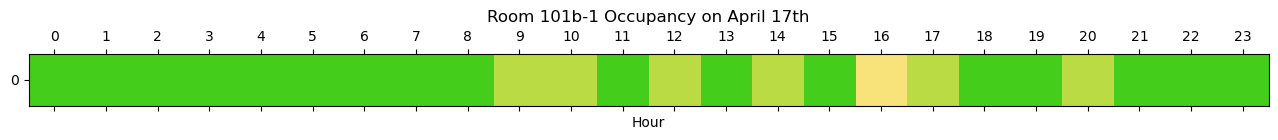

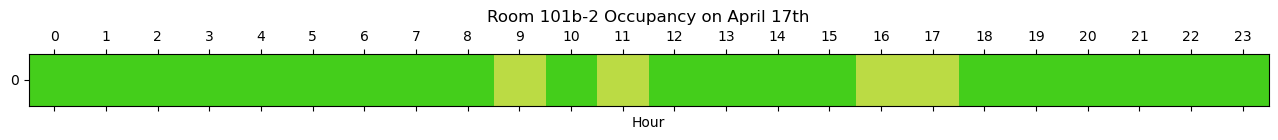

In [16]:
#all rooms at same time

list_of_rooms=["300fuller-104-cw9166-hc-1",'300fuller-116-cw9166-hc-1',"300fuller-101b-cw9166-rw-1",'300fuller-101b-cw9166i-rw-2']
room_name=["104","116","101b-1","101b-2"]
index=0
for item in list_of_rooms:
    number_of_people=count_people_in_room(item)
    create_room_gradient(number_of_people)
    plot_heat_map(room_name[index])
    index+=1